In [1]:
import scipy
from scipy import optimize
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [ ]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
df = first_table
symbols = df['Symbol'].values.tolist()

In [9]:
lil_dfs = []
for ticker in tqdm(symbols):
    lil_df = yf.Ticker(ticker).history(period="5Y")
    lil_dfs.append(lil_df)

 13%|█▎        | 65/506 [00:31<02:54,  2.53it/s]

- BRK.B: No data found, symbol may be delisted


 16%|█▌        | 81/506 [00:39<02:42,  2.61it/s]

- BF.B: No data found for this date range, symbol may be delisted


100%|██████████| 506/506 [04:02<00:00,  2.09it/s]


In [23]:
df = pd.concat(dict(list(zip(symbols, lil_dfs))), 1)
df

MMM                                                         \
                  Open        High         Low       Close   Volume Dividends   
Date                                                                            
2017-02-21  156.783874  157.495789  156.140579  157.281357  1736300      0.00   
2017-02-22  157.307089  159.640107  157.032623  159.571487  2850900      0.00   
2017-02-23  159.459957  160.789436  159.288414  160.557846  2401600      0.00   
2017-02-24  160.240526  161.604309  159.794505  160.746582  2126300      0.00   
2017-02-27  160.823759  160.866648  159.863109  160.317703  1393800      0.00   
...                ...         ...         ...         ...      ...       ...   
2022-02-14  157.824390  158.062083  153.872585  156.497208  4634100      0.00   
2022-02-15  157.200411  157.556965  154.754057  155.833618  3336500      0.00   
2022-02-16  155.496878  156.487304  152.634548  154.139999  4470000      0.00   
2022-02-17  150.850006  151.470001  148.479996  148.639999  6207700      1.49   
2022-02-18  148.199997  149.710007  147.240005  147.619995  5018100      0.00   

                               AOS                        ...     ZION  \
           Stock Splits       Open       High        Low  ...   Volume   
Date                                                      ...            
2017-02-21            0  45.726980  46.547650  45.680876  ...  1726300   
2017-02-22            0  46.381671  46.584534  46.040495  ...  2276100   
2017-02-23            0  46.695185  46.870386  46.068156  ...  1960400   
2017-02-24            0  46.206472  46.630637  46.003609  ...  3605300   
2017-02-27            0  46.593748  47.266881  46.584529  ...  2298900   
...                 ...        ...        ...        ...  ...      ...   
2022-02-14            0  71.169998  72.309998  70.720001  ...  2020800   
2022-02-15            0  72.139999  73.220001  71.970001  ...  1632400   
2022-02-16            0  72.180000  72.860001  71.889999  ...  1230700   
2022-02-17            0  71.860001  72.389999  70.870003  ...  1110000   
2022-02-18            0  70.900002  71.849998  70.900002  ...  1701600   

                                          ZTS                          \
           Dividends Stock Splits        Open        High         Low   
Date                                                                    
2017-02-21      0.00            0   50.922455   52.057513   50.776933   
2017-02-22      0.00            0   51.281402   51.941095   51.155283   
2017-02-23      0.00            0   51.902288   52.183628   51.669453   
2017-02-24      0.00            0   51.931400   52.300053   51.611257   
2017-02-27      0.00            0   52.241838   52.561985   51.950798   
...              ...          ...         ...         ...         ...   
2022-02-14      0.00            0  197.949997  199.320007  194.419998   
2022-02-15      0.00            0  197.789993  201.449997  196.539993   
2022-02-16      0.38            0  196.479996  197.259995  191.259995   
2022-02-17      0.00            0  195.179993  195.559998  192.990005   
2022-02-18      0.00            0  193.029999  193.229996  190.419998   

                                                        
                 Close   Volume Dividends Stock Splits  
Date                                                    
2017-02-21   51.873188  5931400       0.0            0  
2017-02-22   51.785873  3595600       0.0            0  
2017-02-23   51.979900  4673400       0.0            0  
2017-02-24   52.270950  4819700       0.0            0  
2017-02-27   52.222439  4220600       0.0            0  
...                ...      ...       ...          ...  
2022-02-14  196.429993  3381900       0.0            0  
2022-02-15  197.759995  3618400       0.0            0  
2022-02-16  195.089996  2916900       0.0            0  
2022-02-17  193.070007  2435500       0.0            0  
2022-02-18  191.320007  2558900       0.0            0  

[1260 rows x 3540 columns

In [2]:
df.to_pickle('s&p_5Y_hist.pkl')

NameError: name 'df' is not defined

In [2]:
df = pd.read_pickle('s&p_5Y_hist.pkl')
symbols = sorted([el[0] for el in list(df.columns)[::7]])
subset_symbols = sorted(list(np.random.choice(symbols, replace=False, size=50)))

In [3]:
eg_df = df[[(ticker, 'Close') for ticker in subset_symbols]].tail(51)
eg_df = eg_df.interpolate()
lr_eg_df = np.log(eg_df.values[1:]) - np.log(eg_df.values[:-1])
lr_eg_df[np.isnan(lr_eg_df)] = 0

In [4]:
lr_eg_df -= lr_eg_df.mean(0)
dm = pdist(lr_eg_df.T, lambda u, v: (u*v).sum()/(u.std()*v.std()))
dm[pd.isna(dm)] = 0
dm = squareform(dm)

<ipython-input-4-c1d9abe5af81>:2: RuntimeWarning: invalid value encountered in double_scalars
  dm = pdist(lr_eg_df.T, lambda u, v: (u*v).sum()/(u.std()*v.std()))


In [5]:
M = 1000000
pbar = tqdm(total=M)
J = np.zeros(M)
ct = 0
while ct < M:
    i, j, k = np.random.choice(np.arange(dm.shape[0]), replace=False, size=3)
    Cij, Cjk, Cki = np.abs(dm[i,j]), np.abs(dm[j,k]), np.abs(dm[k,i])
    Jijk = Cij*Cjk*Cki
    if Jijk == 0:
        continue
    J[ct] = Jijk
    ct += 1
    pbar.update(1)

100%|█████████▉| 998062/1000000 [00:38<00:00, 24928.31it/s]

In [6]:
eg_df_crisis = df[[(ticker, 'Close') for ticker in subset_symbols]].iloc[725:725+51]
eg_df_crisis = eg_df_crisis.interpolate()
lr_eg_df_crisis = np.log(eg_df_crisis.values[1:]) - np.log(eg_df_crisis.values[:-1])
lr_eg_df_crisis[np.isnan(lr_eg_df_crisis)] = 0

In [7]:
lr_eg_df_crisis -= lr_eg_df_crisis.mean(0)
dm_crisis = pdist(lr_eg_df_crisis.T, lambda u, v: (u*v).sum()/(u.std()*v.std()))
dm_crisis[pd.isna(dm_crisis)] = 0
dm_crisis = squareform(dm_crisis)

<ipython-input-7-729a3ebfab06>:2: RuntimeWarning: invalid value encountered in double_scalars
  dm_crisis = pdist(lr_eg_df_crisis.T, lambda u, v: (u*v).sum()/(u.std()*v.std()))


In [8]:
M = 1000000
pbar = tqdm(total=M)
J_crisis = np.zeros(M)
ct = 0
while ct < M:
    i, j, k = np.random.choice(np.arange(dm_crisis.shape[0]), replace=False, size=3)
    Cij, Cjk, Cki = np.abs(dm_crisis[i,j]), np.abs(dm_crisis[j,k]), np.abs(dm_crisis[k,i])
    Jijk = Cij*Cjk*Cki
    if Jijk == 0:
        continue
    J_crisis[ct] = Jijk
    ct += 1
    pbar.update(1)


100%|██████████| 1000000/1000000 [00:44<00:00, 22533.39it/s]

100%|██████████| 1000000/1000000 [00:55<00:00, 23164.33it/s]

(array([17677., 11260., 10668.,  7340.,  5966.,  5630.,  4587.,  4619.,
         4630.,  4508.,  6589.,  5651.,  5909.,  4936.,  4504.,  5543.,
         6875.,  6659.,  7987.,  8596.,  8846.,  8375.,  8518., 10164.,
         9883., 10595., 11678., 14390., 15174., 14976., 16379., 16224.,
        16117., 17499., 18601., 21594., 20214., 22854., 21242., 23688.,
        24602., 22236., 22880., 23588., 20987., 20527., 21928., 22946.,
        22252., 20975., 19573., 17914., 19180., 19920., 16505., 17840.,
        16306., 17550., 15257., 14876., 13184., 14752., 11405., 13530.,
        10078., 10477., 10075.,  9237.,  8008.,  7319.,  6479.,  6230.,
         4868.,  4686.,  3800.,  3058.,  2482.,  2681.,  1634.,  2132.,
         1387.,  1843.,   930.,   536.,   682.,   456.,   832.,   553.,
          522.,   314.,   159.,   116.,   150.,   160.,   147.,     0.,
            0.,     0.,     0.,   111.]),
 array([6.12132324e+00, 9.98292608e+02, 1.99046389e+03, 2.98263518e+03,
        3.97480646e+03

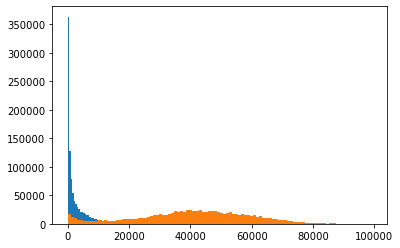

In [9]:
plt.hist(J, bins=100)
plt.hist(J_crisis, bins=100)

In [232]:
def q(Q, B, J):
    a = np.exp(2*B*Q)
    b = 2*np.exp(-2*B*J*np.tanh(B*Q))
    c = np.exp(-2*B*Q)
    return (a - b + c)/(a + b + c)

def Q(x, T, N, J):
    B = 1/T
    hist, bin_edges = np.histogram(J, bins=100)
    hist = hist 
    return (((bin_edges[:-1] + bin_edges[1:])/2) * (hist/hist.sum()) * q(x, B, ((bin_edges[:-1] + bin_edges[1:])/2)) * (bin_edges[1] - bin_edges[0])).sum() / N

def Q_curve(xs, T, N, J):
    Qs = np.zeros_like(xs)
    for ct, y in tqdm(enumerate(xs)):
        Qs[ct] = Q(y, T, N, J)
    return Qs

def g(xs, Qs, T, N, J):
    starting_points = Qs[np.isclose(xs, Qs, atol=1e-02)]
    fixed_points = tuple(np.unique([optimize.fixed_point(Q, sp, args=(T, N, J)) for sp in starting_points]))
    return len(fixed_points)

f = lambda Ta, Tb, xs, N, J: exp((1-(abs(g(xs, Q_curve(xs, Tb, N, J), Tb, N, J)-g(xs, Q_curve(xs, Ta, N, J), Ta, N, J))>0))) * abs(Tb-Ta)

1001it [00:16, 60.38it/s]


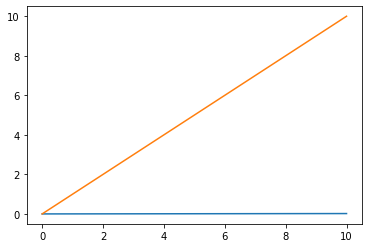

In [158]:
T = 1000
B = 1/T
N = 10000000
Qs = np.zeros(1001)
xs = np.linspace(0, 10, 1001)
for ct, y in tqdm(enumerate(xs)):
    Qs[ct] = Q(y, T, N, J)
plt.plot(xs, Qs)
plt.plot(xs, xs)

In [159]:
starting_points = Qs[np.isclose(xs, Qs, atol=1e-02)]
fixed_points = tuple(np.unique([optimize.fixed_point(Q, sp, args=(T, N, J)) for sp in starting_points]))

In [233]:
from math import sqrt, exp, log
xs = np.linspace(0, 10, 1001)
gr = (sqrt(5) + 1) / 2
tol=1e-1
T1 = .1
T2 = 1000
T3 = T2 - (T2 - T1) / gr
T4 = T1 + (T2 - T1) / gr
while abs(T2 - T1) > tol:
    f_T1_T4 = f(T1, T4, xs, N, J_crisis)
    f_T2_T3 = f(T2, T3, xs, N, J_crisis)
    if f_T1_T4 < f_T2_T3:
        T2 = T4
    else:
        T1 = T3
    T3 = T2 - (T2 - T1) / gr
    T4 = T1 + (T2 - T1) / gr
    print(T1, T2)
Tc = (T1+T2)/2
    

1001it [00:16, 61.18it/s]
1001it [00:15, 63.54it/s]
1001it [00:18, 53.09it/s]
1001it [00:20, 49.99it/s]


382.0278146489802 1000


1001it [00:17, 57.12it/s]
1001it [00:17, 56.60it/s]
1001it [00:19, 52.48it/s]
1001it [00:21, 47.07it/s]


382.0278146489802 763.9556292979603


1001it [00:15, 63.23it/s]
1001it [00:15, 63.68it/s]
1001it [00:15, 63.73it/s]
1001it [00:15, 63.95it/s]


382.0278146489802 618.0721853510199


1001it [00:15, 64.10it/s]
1001it [00:15, 63.56it/s]
1001it [00:15, 63.60it/s]
1001it [00:15, 63.63it/s]


382.0278146489802 527.9112585959206


1001it [00:15, 64.08it/s]
1001it [00:15, 63.21it/s]
1001it [00:15, 63.78it/s]
1001it [00:15, 63.38it/s]


437.75033184082133 527.9112585959206


1001it [00:18, 55.30it/s]
1001it [00:17, 58.13it/s]
1001it [00:15, 62.95it/s]
1001it [00:15, 63.22it/s]


472.18874140407945 527.9112585959206


1001it [00:15, 62.74it/s]
1001it [00:16, 62.27it/s]
1001it [00:15, 63.95it/s]
1001it [00:15, 63.51it/s]


472.18874140407945 506.6271509673376


1001it [00:15, 62.71it/s]
1001it [00:15, 63.61it/s]
1001it [00:15, 63.60it/s]
1001it [00:15, 63.29it/s]


485.3430433387547 506.6271509673376


1001it [00:15, 63.32it/s]
1001it [00:15, 63.87it/s]
1001it [00:15, 63.51it/s]
1001it [00:15, 62.72it/s]


485.3430433387547 498.49734527342986


1001it [00:15, 63.29it/s]
1001it [00:15, 63.70it/s]
1001it [00:15, 63.59it/s]
1001it [00:15, 64.37it/s]


485.3430433387547 493.47284903266245


1001it [00:15, 63.59it/s]
1001it [00:15, 63.26it/s]
1001it [00:16, 61.88it/s]
1001it [00:17, 57.45it/s]


488.44835279189505 493.47284903266245


1001it [00:14, 70.31it/s]
1001it [00:14, 71.39it/s]
1001it [00:14, 70.75it/s]
1001it [00:14, 71.46it/s]


488.44835279189505 491.55366224503535


1001it [00:16, 61.84it/s]
1001it [00:15, 62.61it/s]
1001it [00:15, 63.58it/s]
1001it [00:15, 63.38it/s]


488.44835279189505 490.3675395795221


1001it [00:15, 63.14it/s]
1001it [00:16, 59.50it/s]
1001it [00:16, 61.44it/s]
1001it [00:16, 60.34it/s]


488.44835279189505 489.63447545740826


1001it [00:16, 59.93it/s]
1001it [00:16, 59.68it/s]
1001it [00:15, 63.22it/s]
1001it [00:15, 63.57it/s]


488.44835279189505 489.1814169140088


1001it [00:16, 60.17it/s]
1001it [00:15, 62.58it/s]
1001it [00:15, 63.18it/s]
1001it [00:16, 60.08it/s]


488.7283583706094 489.1814169140088


1001it [00:16, 61.05it/s]
1001it [00:16, 60.34it/s]
1001it [00:15, 63.31it/s]
1001it [00:16, 61.87it/s]


488.9014113352944 489.1814169140088


1001it [00:15, 63.48it/s]
1001it [00:15, 62.93it/s]
1001it [00:15, 63.35it/s]
1001it [00:15, 63.53it/s]


489.0083639493237 489.1814169140088


1001it [00:15, 63.48it/s]
1001it [00:17, 58.82it/s]
1001it [00:19, 51.20it/s]
1001it [00:18, 53.00it/s]


489.07446429997947 489.1814169140088


1001it [00:19, 51.34it/s]
1001it [00:17, 56.82it/s]
1001it [00:16, 59.99it/s]
1001it [00:16, 62.53it/s]


489.115316563353 489.1814169140088


In [234]:
g_T1 = g(xs, Q_curve(xs, T1, N, J_crisis), T1, N, J_crisis)
T1, g_T1

1001it [00:15, 63.34it/s]


(489.115316563353, 3)

In [235]:
g_T2 = g(xs, Q_curve(xs, T2, N, J_crisis), T2, N, J_crisis)
T2, g_T2

1001it [00:15, 64.49it/s]


(489.1814169140088, 1)

In [211]:
Qs = Q_curve(xs, 34.53840956325815, N, J)
starting_points = Qs[np.isclose(xs, Qs, atol=1e-02)]
fixed_points = tuple(np.unique([optimize.fixed_point(Q, sp, args=(34.53840956325815, N, J)) for sp in starting_points]))

1001it [00:15, 62.75it/s]


In [214]:
starting_points

array([0.        , 0.01518305, 0.02944127, 0.07889948, 0.08527457,
       0.09086347, 0.09578997, 0.10015594])

In [212]:
fixed_points

(-0.09178882725420139,
 -3.529592031968199e-18,
 0.0,
 0.09179160152059801,
 0.09179160152059802)

In [217]:
exp(1-abs(7-1)), exp(1-abs(2-1)), exp(1-abs(1-1))

(0.006737946999085467, 1.0, 2.718281828459045)

In [203]:
g_T2 = g(xs, Q_curve(xs, T2, N, J), T2)
T2, g_T2

1001it [00:15, 63.46it/s]


(44.587402044793, 1)

In [218]:
Qs = Q_curve(xs, T2, N, J)
starting_points = Qs[np.isclose(xs, Qs, atol=1e-02)]
fixed_points = tuple(np.unique([optimize.fixed_point(Q, sp, args=(T2, N, J)) for sp in starting_points]))

1001it [00:16, 61.75it/s]


In [221]:
Qs = Q_curve(xs, (T1+T2)/2, N, J)
starting_points = Qs[np.isclose(xs, Qs, atol=1e-02)]
fixed_points = tuple(np.unique([optimize.fixed_point(Q, sp, args=((T1+T2)/2, N, J)) for sp in starting_points]))

1001it [00:15, 62.75it/s]
